<div class="alert alert-block alert-success">
<b>Imported libraries</b>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import AutoMinorLocator

sns.set_style('white')

<div class="alert alert-block alert-info">
<b>Load the Data and info about data</b>
</div>

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
start_p = int(input('Pick the starting price: '))
limit_p = int(input('Pick the price limit: '))
filtro = (df.price >= start_p) & (df.price <= limit_p)

Pick the starting price: 200
Pick the price limit: 400


<div class="alert alert-block alert-info">
<b>Histogram of price in New York</b>
</div>

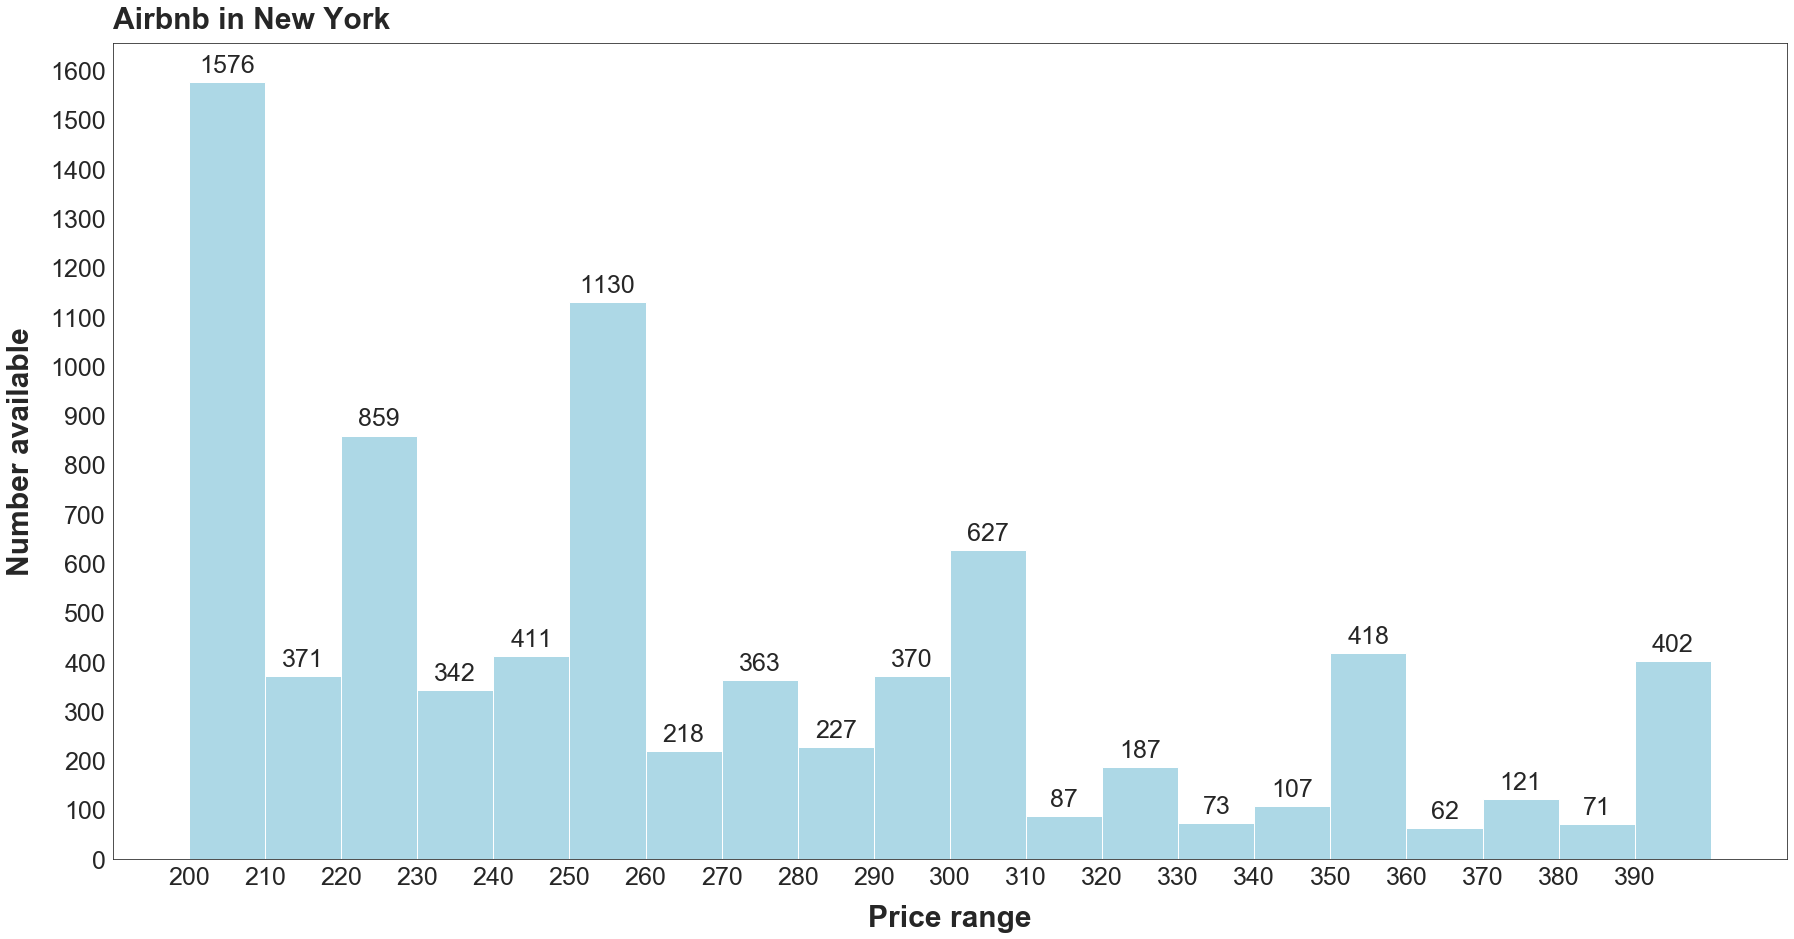

In [4]:
plt.figure(figsize = (30,15))
plt.title('Airbnb in New York', weight = 'bold', loc = 'left', fontsize = 30, pad = 15)
plt.xlabel('Price range', weight = 'bold', fontsize = 30, labelpad = 15)
plt.ylabel('Number available', weight = 'bold', fontsize = 30,  labelpad = 15)
n, bins, patches = plt.hist(df.price[filtro], bins = 20 , color = 'lightblue')
# xticks position
xticks = [(bins[idx] + value)/2 for idx, value in enumerate(bins[:-1])]
# xticks text values
xticks_labels = ['{:.0f}'.format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, fontsize = 25)
# yticks text values
for idx, value in enumerate(n):
    if value > 0:
        # left-right, below-above, type, space, fontsize
        plt.text(xticks[idx]+5, value+10, int(value), 
        va = 'bottom', ha = 'center', fontsize = 25)
start, end = plt.ylim()
plt.yticks(np.arange(start, end, 100), fontsize = 25)
plt.show()

<div class="alert alert-block alert-info">
<b>Geografical scatter chart of New York</b>
</div>

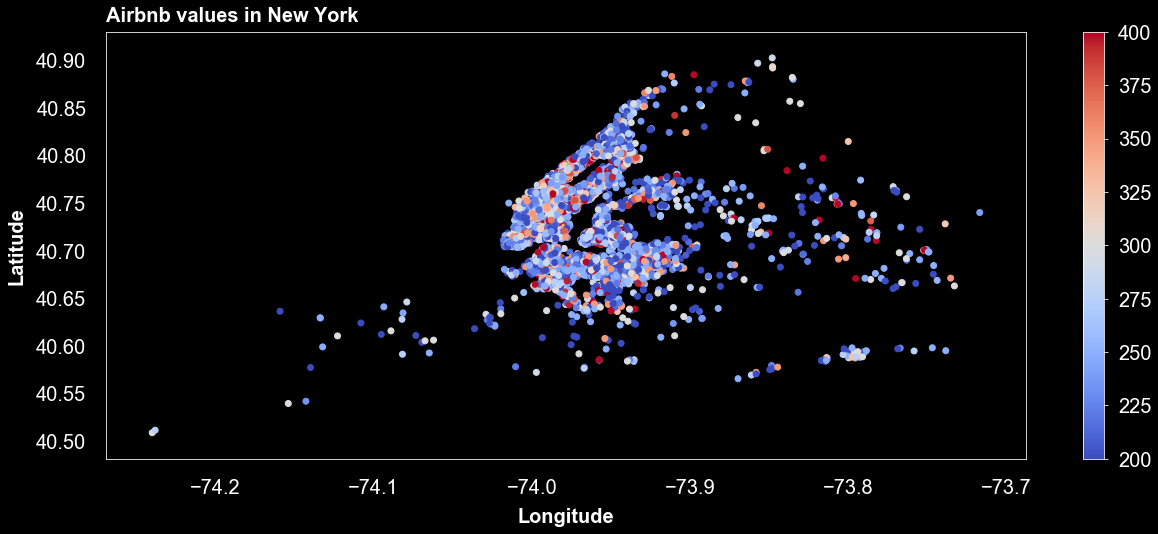

In [5]:
with plt.style.context('dark_background'):
    plt.figure(figsize = (20,10))
    df_manh = df[df.neighbourhood_group == 'Manhattan']
    plt.title('Airbnb values in New York', weight = 'bold', loc = 'left', fontsize = 20, pad = 10)
    plt.xlabel('Longitude', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.ylabel('Latitude', weight = 'bold', fontsize = 20,  labelpad = 10)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 10, size = 10)   
    plt.tight_layout(pad = 10) 
    plt.scatter(x = df.longitude[filtro], y = df.latitude[filtro], 
                c = df.price[filtro],  cmap = 'coolwarm', alpha = 1)
    cb1 = plt.colorbar()
    cb1.ax.tick_params(labelsize = 20, pad = 10)
    plt.show()

<div class="alert alert-block alert-info">
<b>Create Brooklyn object</b>
</div>

In [6]:
print(df['neighbourhood_group'].unique())
df_bro = df[df['neighbourhood_group'] == 'Brooklyn']

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


<div class="alert alert-block alert-info">
<b>Bar chart of Brooklyn</b>
</div>

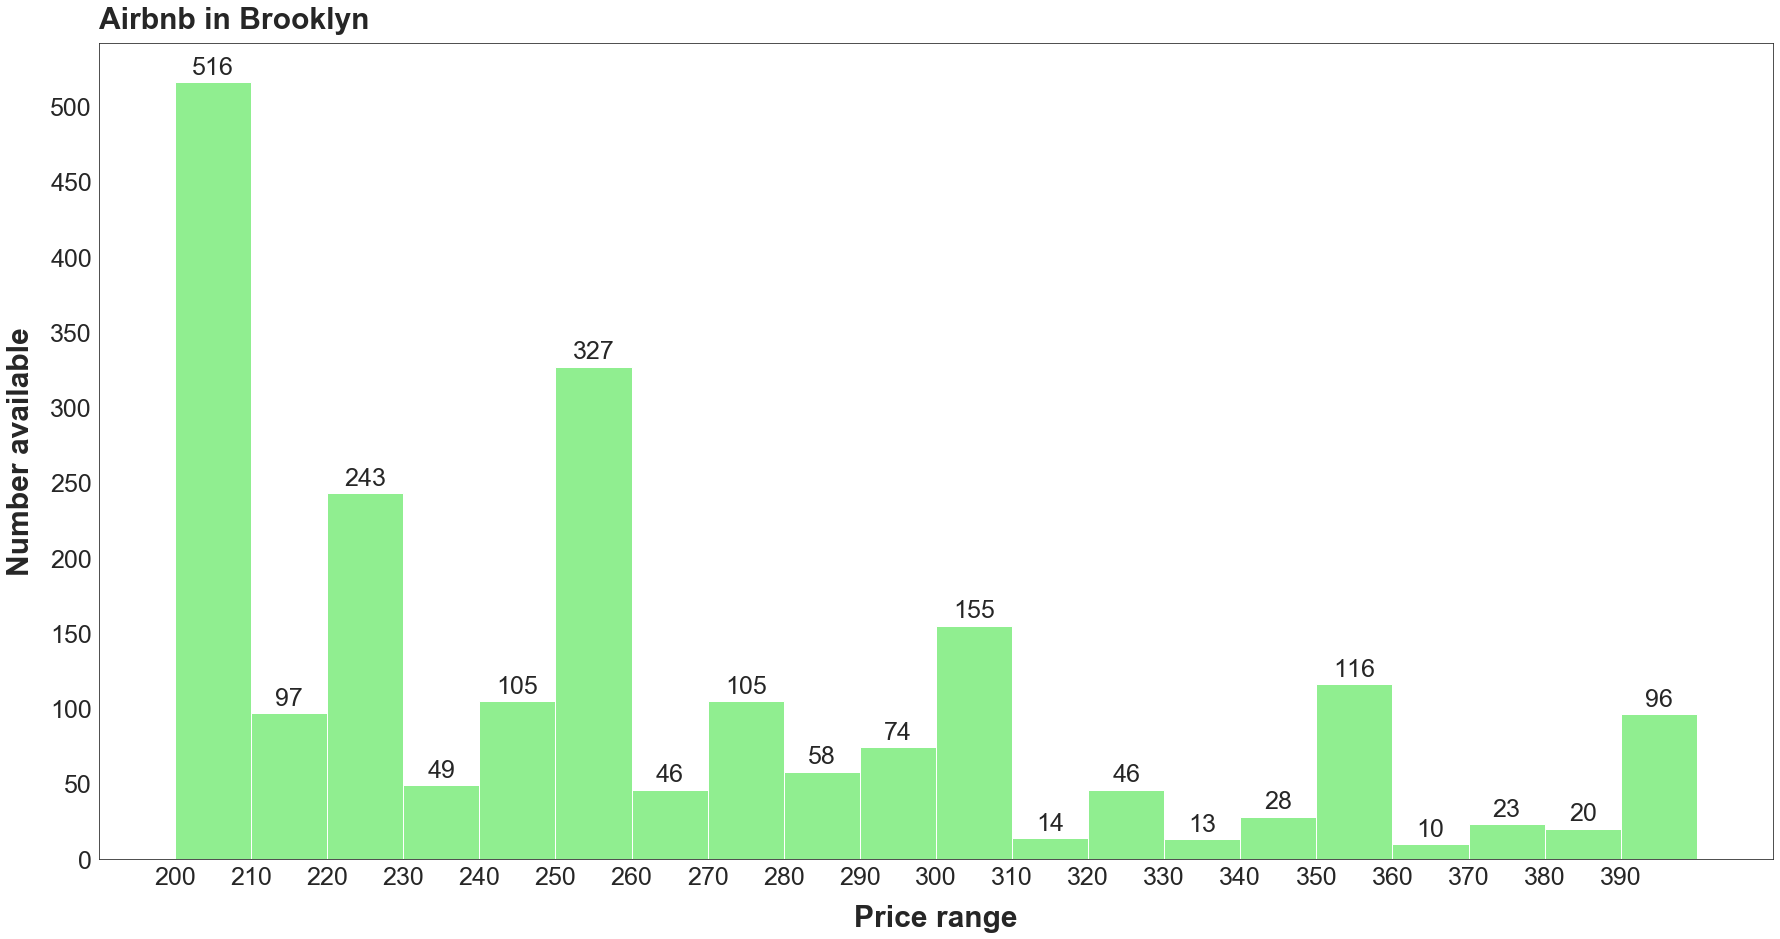

In [7]:
plt.figure(figsize = (30,15))
df_Bro = df[df.neighbourhood_group == 'Brooklyn']
plt.title('Airbnb in Brooklyn', weight = 'bold', loc = 'left', fontsize = 30, pad = 15)
plt.xlabel('Price range', weight = 'bold', fontsize = 30, labelpad = 15)
plt.ylabel('Number available', weight = 'bold', fontsize = 30,  labelpad = 15)
n, bins, patches = plt.hist(df_bro.price[filtro], bins = 20 , color = 'lightgreen')
# xticks position
xticks = [(bins[idx] + value)/2 for idx, value in enumerate(bins[:-1])]
# xticks text values
xticks_labels = ['{:.0f}'.format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, fontsize = 25)
# yticks text values
for idx, value in enumerate(n):
    if value > 0:
        # left-right, below-above, type, space, fontsize
        plt.text(xticks[idx]+5, value+2, int(value), 
                 va = 'bottom', ha = 'center', fontsize = 25)
start, end = plt.ylim()
plt.yticks(np.arange(start, end, 50), fontsize = 25)
plt.show()

<div class="alert alert-block alert-info">
<b>Geografical scatter chart of manhattan</b>
</div>

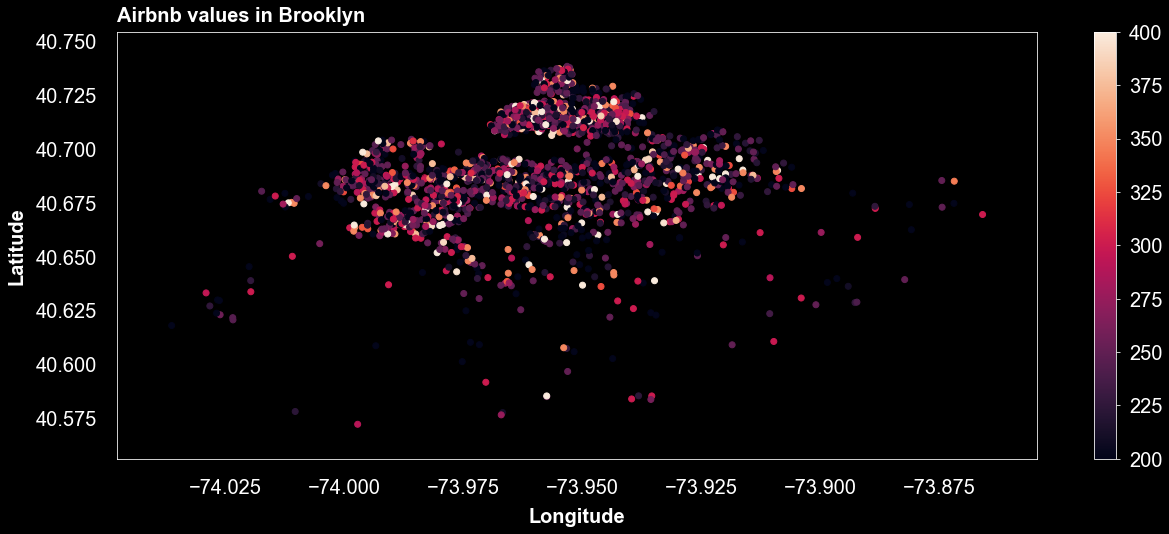

In [8]:
with plt.style.context('dark_background'):
    plt.figure(figsize = (20,10))
    plt.title('Airbnb values in Brooklyn', weight = 'bold', loc = 'left', fontsize = 20, pad = 10)
    plt.xlabel('Longitude', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.ylabel('Latitude', weight = 'bold', fontsize = 20,  labelpad = 10)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 10, size = 10)                                
    plt.tight_layout(pad = 10) 
    plt.scatter(x = df_Bro.longitude[filtro], y = df_Bro.latitude[filtro], c = df_Bro.price[filtro])
    cb1 = plt.colorbar()
    cb1.ax.tick_params(labelsize = 20, pad = 10)
    plt.show()